In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
cotacao_2018 = pd.read_csv('COTACAO_2018B.csv', delimiter=',')

In [66]:
cotacao_2018.head()

,ano,mes,dia,codigo,nome_resumido,tipo_mercado,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,preco_ask,preco_bid,volume
0,2018,1,2,AALR3,ALLIAR,10,1494,1516,1470,1489,1475,1489,140299100
1,2018,1,2,AALR3F,ALLIAR,20,1479,1493,1479,1480,1473,1516,334384
2,2018,1,2,AAPL34,APPLE,10,5681,5681,5630,5630,5500,5630,5074700
3,2018,1,2,AAPL34F,APPLE,20,5681,6500,5654,5654,5459,6200,363770
4,2018,1,2,ABCB2,ABC BRASIL,10,411,420,411,420,413,600,497700


In [67]:
            # Limpar o nome e o código

cotacao_2018['codigo'] = cotacao_2018['codigo'].str.strip()
cotacao_2018['nome_resumido'] = cotacao_2018['nome_resumido'].str.strip()

In [68]:
            # Formatar o dataset para usar year-month-day como índice

cotacao_2018.columns = ['year', 'month', 'day', 'codigo', 'nome_resumido', 'tipo_mercado', 'preco_abertura', 'preco_maximo', 'preco_minimo', 'preco_fechamento', 'preco_ask', 'preco_bid', 'volume']
datas = pd.to_datetime(cotacao_2018[['day', 'month', 'year']])

cotacao_2018 = cotacao_2018.set_index(datas)

In [69]:
            # Selecionar negociações da Petrobras
petr4_2018 = cotacao_2018[cotacao_2018.codigo == 'PETR4']
petr4_2018

,year,month,day,codigo,nome_resumido,tipo_mercado,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,preco_ask,preco_bid,volume
2018-01-02,2018,1,2,PETR4,PETROBRAS,10,1619,1655,1619,1655,1653,1655,54962814900
2018-01-03,2018,1,3,PETR4,PETROBRAS,10,1649,1672,1637,1670,1669,1670,92761001600
2018-01-04,2018,1,4,PETR4,PETROBRAS,10,1678,1696,1662,1673,1673,1675,62409986400
2018-01-05,2018,1,5,PETR4,PETROBRAS,10,1670,1686,1657,1683,1682,1683,45200759800
2018-01-08,2018,1,8,PETR4,PETROBRAS,10,1674,1703,1671,1703,1702,1704,48057591400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,2018,12,20,PETR4,PETROBRAS,10,2231,2232,2135,2149,2149,2150,307698024800
2018-12-21,2018,12,21,PETR4,PETROBRAS,10,2140,2198,2125,2155,2155,2158,195600242500
2018-12-26,2018,12,26,PETR4,PETROBRAS,10,2059,2168,2042,2168,2161,2168,162197320600
2018-12-27,2018,12,27,PETR4,PETROBRAS,10,2152,2198,2128,2167,2167,2168,160590147100


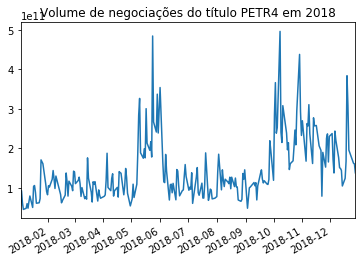

In [70]:
petr4_2018.volume.plot()
plt.title("Volume de negociações do título PETR4 em 2018")
plt.show()

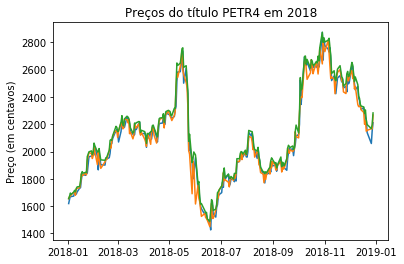

In [71]:
plt.clf()
plt.title("Preços do título PETR4 em 2018")
plt.plot(petr4_2018.preco_abertura)
plt.plot(petr4_2018.preco_fechamento)
plt.plot(petr4_2018.preco_maximo)
plt.ylabel("Preço (em centavos)")
plt.show()

### Reproduzindo o Ichimoku Cloud

Temos, já, os preços de abertura, máxima, mínima e fechamento do ativo alvo. Agora é de interesse reproduzir o funcionamento dos 5 componentes da Ichimoku Cloud. São 5:

- Tenkan
- Kijun
- Senkou A
- Senkou B
- Chikou

Reproduziremos a formação de cada um deles em uma implementação não necessariamente eficiente

### Tenkan

Também conhecida como linha de conversão, calculada pela média do máximo e mínimo valores dos passados 9 períodos. Ou seja:
    
    - Tenkan = (máxima de 9 períodos + mínima de 9 períodos) / 2

In [72]:
max_maximos_9 = petr4_2018.preco_maximo.rolling(9).max()

In [73]:
min_minimos_9 = petr4_2018.preco_minimo.rolling(9).min()

In [74]:
tenkan = (max_maximos_9 + min_minimos_9)/2

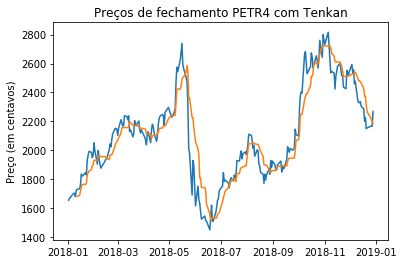

In [75]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Tenkan")
plt.plot(petr4_2018.preco_fechamento) # em azul
plt.plot(tenkan) # em laranja
plt.ylabel("Preço (em centavos)")
plt.show()

### Kijun

Também conhecida por 'Linha base' é um container de tendência primária. É calculado pela média do maior máximo e menor mínimo dos últimos 26 períodos.
    
    - Kijun = (máxima de 26 + mínima de 26) / 2

In [76]:
max_maximos_26 = petr4_2018.preco_maximo.rolling(26).max()

In [77]:
min_minimos_26 = petr4_2018.preco_minimo.rolling(26).min()

In [78]:
kijun = (max_maximos_26 + min_minimos_26)/2

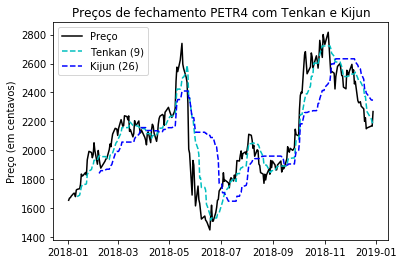

In [79]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Tenkan e Kijun")
plt.plot(petr4_2018.preco_fechamento, 'k', label='Preço') 
plt.plot(tenkan, 'c--', label='Tenkan (9)') 
plt.plot(kijun, 'b--', label='Kijun (26)')
plt.ylabel("Preço (em centavos)")
plt.legend()
plt.show()

### Senkou A

Também chamado de Span A. É a média dos dois componentes Tenkan e Kijun:

    - Senkou A = (Tenkan + Kijun) / 2

In [80]:
senkou_a = (tenkan + kijun) / 2

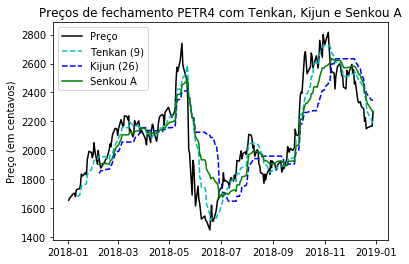

In [81]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Tenkan, Kijun e Senkou A")
plt.plot(petr4_2018.preco_fechamento, 'k', label='Preço') 
plt.plot(tenkan, 'c--', label='Tenkan (9)') 
plt.plot(kijun, 'b--', label='Kijun (26)')
plt.plot(senkou_a, 'g', label='Senkou A')
plt.ylabel("Preço (em centavos)")
plt.legend()
plt.show()

### Senkou B

    - Senkou B = (máxima de 52 + mínima de 52) / 2

In [82]:
max_maximos_52 = petr4_2018.preco_maximo.rolling(52).max()
min_minimos_52 = petr4_2018.preco_minimo.rolling(52).min()

senkou_b = (max_maximos_52 + min_minimos_52)/2

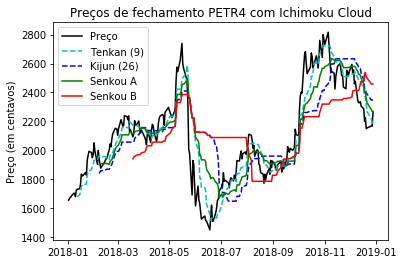

In [83]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Ichimoku Cloud")
plt.plot(petr4_2018.preco_fechamento, 'k', label='Preço') 
plt.plot(tenkan, 'c--', label='Tenkan (9)') 
plt.plot(kijun, 'b--', label='Kijun (26)')
plt.plot(senkou_a, 'g', label='Senkou A')
plt.plot(senkou_b, 'r', label='Senkou B')
plt.ylabel("Preço (em centavos)")
plt.legend()
plt.show()

Pequeno teste ilustrando momentos em que o preço do PETR4 esteve acima da nuvem de Ichimoku

In [84]:
petr_acima = petr4_2018[(petr4_2018.preco_fechamento > senkou_a) & (petr4_2018.preco_fechamento > senkou_b)]

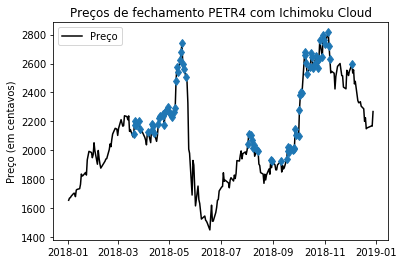

In [85]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Ichimoku Cloud")
plt.plot(petr4_2018.preco_fechamento, 'k', label='Preço') 
plt.plot(petr_acima.preco_fechamento, 'd')

plt.ylabel("Preço (em centavos)")
plt.legend()
plt.show()

### Chikou

Último indicador da Ichimoku Cloud. Corresponde ao preço atual deslocado períodos à esquerda

In [86]:
chikou = petr4_2018.preco_fechamento.shift(-26)

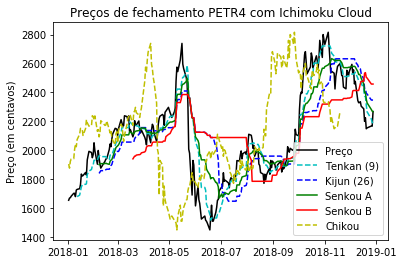

In [87]:
plt.clf()
plt.title("Preços de fechamento PETR4 com Ichimoku Cloud")
plt.plot(petr4_2018.preco_fechamento, 'k', label='Preço') 
plt.plot(tenkan, 'c--', label='Tenkan (9)') 
plt.plot(kijun, 'b--', label='Kijun (26)')
plt.plot(senkou_a, 'g', label='Senkou A')
plt.plot(senkou_b, 'r', label='Senkou B')
plt.plot(chikou, 'y--', label='Chikou')
plt.ylabel("Preço (em centavos)")
plt.legend()
plt.show()

In [88]:
# Resumir todos os indicadores em uma função

def calculate_ichimoku(df):
    ichimoku = {}
    
    # Tenkan
    max_maximos_9 = df.preco_maximo.rolling(9).max()
    min_minimos_9 = df.preco_minimo.rolling(9).min()
    ichimoku['tenkan'] = (max_maximos_9 + min_minimos_9)/2
    
    # Kijun
    max_maximos_26 = df.preco_maximo.rolling(26).max()
    min_minimos_26 = df.preco_minimo.rolling(26).min()
    ichimoku['kijun'] = (max_maximos_26 + min_minimos_26)/2
    
    # Senkou A
    ichimoku['senkou_a'] = (ichimoku['tenkan'] + ichimoku['kijun']) / 2
    
    # Senkou B
    max_maximos_52 = df.preco_maximo.rolling(52).max()
    min_minimos_52 = df.preco_minimo.rolling(52).min()
    ichimoku['senkou_b'] = (max_maximos_52 + min_minimos_52)/2
    
    # Chikou
    ichimoku['chikou'] = df.preco_fechamento.shift(-26)
    
    return ichimoku    

In [89]:
def prices_above_cloud(df, ichimoku):
    return df[(df.preco_fechamento > ichimoku['senkou_a']) & (df.preco_fechamento > ichimoku['senkou_b'])]

In [90]:
from datetime import timedelta

def bullish_prices(prices_above_cloud):
    df = prices_above_cloud.copy()
    df.reset_index(level=0, inplace=True)
    
#     print(df[0])
    
    entry_points = []
    exit_points = []
    
    holding = False
    last_seen = None
    
    for index, row in df.iterrows():
        if not holding:
            entry_points.append((row['index'], row['preco_fechamento']))
            holding = True
        else:
            diff = row['index'] - df.loc[index - 1]['index']
#             print(row['index'], diff)
            if diff.days >= 15:
                exit_points.append((df.loc[index - 1]['index'], df.loc[index - 1]['preco_fechamento']))
                entry_points.append((row['index'], row['preco_fechamento']))
                holding = True
            
    return (entry_points, exit_points)

In [91]:
petr4_ichimoku = calculate_ichimoku(petr4_2018)

entry_points, exit_points = bullish_prices(prices_above_cloud(petr4_2018, petr4_ichimoku))

In [92]:
entry_points, exit_points

([(Timestamp('2018-03-20 00:00:00'), 2116),
  (Timestamp('2018-08-02 00:00:00'), 2041),
  (Timestamp('2018-08-29 00:00:00'), 1930),
  (Timestamp('2018-12-03 00:00:00'), 2594)],
 [(Timestamp('2018-05-21 00:00:00'), 2505),
  (Timestamp('2018-08-14 00:00:00'), 1998),
  (Timestamp('2018-11-07 00:00:00'), 2630)])

In [93]:
def calculate_profit(entry_points, exit_points):
#     print(len(entry_points), len(exit_points))
    totalRate = 1
    for i in range(len(exit_points)):
        profitRate = exit_points[i][1]/entry_points[i][1]
        totalRate *= profitRate
#         print('Profit Rate %', str(profitRate))
    return totalRate

In [94]:
calculate_profit(entry_points, exit_points)

1.5792212727809258

In [95]:
# Função para executar todo o processo para um ativo qualquer

def execute_ichimoku_strategy(df, asset_code):
    asset_df = cotacao_2018[cotacao_2018.codigo == asset_code]
    
    ichimoku = calculate_ichimoku(asset_df)
    ins, outs = bullish_prices(prices_above_cloud(asset_df, ichimoku))
    
    return(asset_code, calculate_profit(ins, outs))

In [96]:
execute_ichimoku_strategy(cotacao_2018, 'VALE3')
execute_ichimoku_strategy(cotacao_2018, 'BBDC4')
execute_ichimoku_strategy(cotacao_2018, 'ECOR3')
execute_ichimoku_strategy(cotacao_2018, 'ITSA4')
execute_ichimoku_strategy(cotacao_2018, 'WEGE3')
execute_ichimoku_strategy(cotacao_2018, 'WIZS3')
execute_ichimoku_strategy(cotacao_2018, 'GRND3')

('GRND3', 1)

In [97]:
ibov = [('ABEV3', 3.863), ('AZUL4', 0.936), ('B3SA3', 4.913), ('BBAS3', 3.427), ('BBDC3', 1.704), ('BBDC4', 6.341), ('BBSE3', 1.163), ('BPAC11', 0.731), ('BRAP4', 0.409), ('BRDT3', 1.044), ('BRFS3', 1.234), ('BRKM5', 0.416), ('BRML3', 0.770), ('BTOW3', 0.690), ('CCRO3', 1.013), ('CIEL3', 0.393), ('CMIG4', 0.722), ('COGN3', 0.867), ('CRFB3', 0.433), ('CSAN3', 0.609), ('CSNA3', 0.412), ('CVCB3', 0.264), ('CYRE3', 0.417), ('ECOR3', 0.151), ('EGIE3', 0.660), ('ELET3', 0.634), ('ELET6', 0.460), ('EMBR3', 0.664), ('ENBR3', 0.329), ('EQTL3', 1.199), ('FLRY3', 0.469), ('GGBR4', 1.027), ('GNDI3', 1.602), ('GOAU4', 0.314), ('GOLL4', 0.229), ('HAPV3', 0.649), ('HGTX3', 0.156), ('HYPE3', 0.722), ('IGTA3', 0.231), ('IRBR3', 2.078), ('ITSA4', 2.876), ('ITUB4', 7.738), ('JBSS3', 2.225), ('KLBN11', 0.659), ('LAME4', 0.954), ('LREN3', 2.234), ('MGLU3',  1.838), ('MRFG3', 0.231), ('MRVE3', 0.301), ('MULT3', 0.467), ('NTCO3', 0.827), ('PCAR4', 0.663), ('PETR3', 4.126), ('PETR4', 6.401), ('QUAL3', 0.579), ('RADL3', 1.321), ('RAIL3', 1.217), ('RENT3', 1.497), ('SANB11', 0.759), ('SBSP3', 1.032), ('SMLS3', 0.113), ('SULA11', 0.874), ('SUZB3', 1.433), ('TAEE11', 0.337), ('TIMP3', 0.673), ('TOTS3', 0.500), ('UGPA3', 1.364), ('USIM5', 0.247), ('VALE3', 7.903), ('VIVT4', 1.227), ('VVAR3', 0.800), ('WEGE3', 1.453), ('YDUQ3', 0.786)]

In [98]:
def run_ichi_batch(arr):
    ibov_ichi = {'code': [], 'profit': []}
    for i in range(len(arr)):
#         print(execute_ichimoku_strategy(cotacao_2018, arr[i]))
        ibov_ichi['code'].append(arr[i][0])
        ibov_ichi['profit'].append(execute_ichimoku_strategy(cotacao_2018, arr[i][0])[1] * arr[i][1])
    return pd.DataFrame.from_dict(ibov_ichi)

In [99]:
ibov_ichimoku = run_ichi_batch(ibov)

In [100]:
ibov_ichimoku.profit.sum() / 100

1.1502811385850302

In [101]:
ibov_ichimoku.describe()

,profit
count,73.000000
mean,1.575728
std,2.056857
min,0.123380
25%,0.497043
50%,0.827000
75%,1.597092
max,10.108595
